In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.shape

(30, 2)

In [6]:
### correlation

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


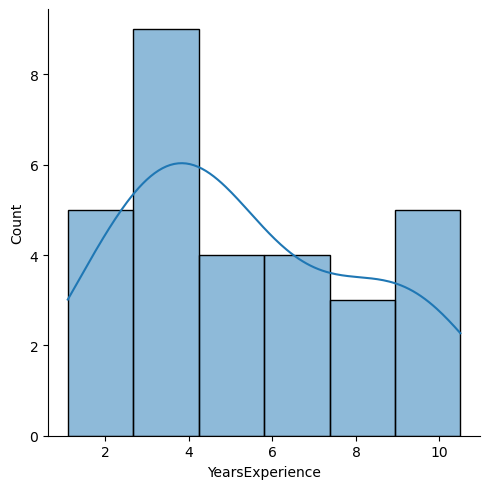

In [9]:
sns.displot(df['YearsExperience'],kde=True)

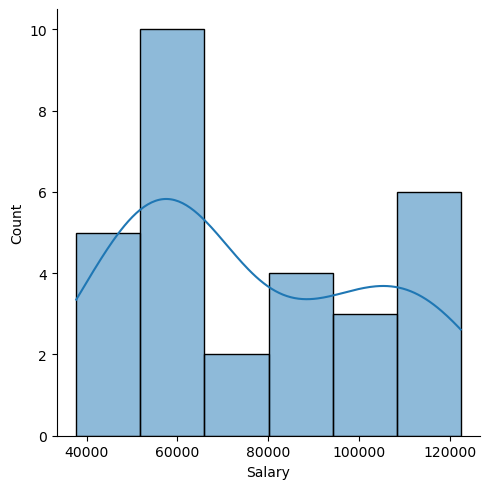

In [8]:
sns.displot(df['Salary'],kde=True)

In [9]:
###fitting the linear regression model

In [8]:
import statsmodels.formula.api as smf
model=smf.ols('YearsExperience~Salary',data=df).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        11:19:34   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

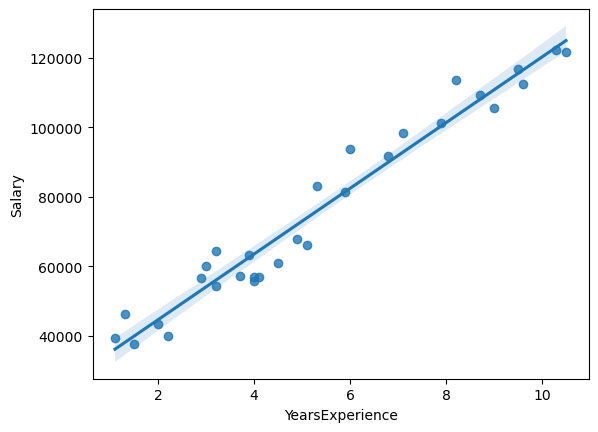

In [10]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [11]:
##coefficents

In [12]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [13]:
###t and p values

In [14]:
print(model.tvalues, '\n',model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [15]:
### r squared

In [16]:
model.rsquared

0.9569566641435086

In [17]:
model.rsquared_adj

0.9554194021486339

In [18]:
### manual prediction

In [19]:
delivey=(-2.383161)+(0.000101)*39891.0
delivey

1.6458300000000006

In [20]:
###  automatic prediction

In [21]:
new_data=pd.Series([39891.0,63218.0])
new_data

0    39891.0
1    63218.0
dtype: float64

In [22]:
data_pred=pd.DataFrame(new_data,columns=['Salary'])
data_pred

,Salary
0,39891.0
1,63218.0


In [23]:
model.predict(data_pred)

0    1.656428
1    4.018652
dtype: float64